In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [2]:
#%matplotlib notebook

 # Video i/p 

In [3]:
start = time.time()
time.sleep(.1)
start - time.time()

-0.10072946548461914

In [4]:

count_frames("C:/Users/shrin/Documents/Abhilash/tata steel/Slab Dimension/0 - 2019-12-16 18-40-25-232.mov")

89995

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Slab Dimension/0 - 2019-12-16 18-40-25-232.mov")
saveimg = []
start = time.time()
while(True):
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #_ , imgThresh = cv2.threshold(gray,30,100,cv2.THRESH_BINARY)
    saveimg.append(gray)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    #cv2.imshow('thresh',imgThresh)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [5]:
cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/Slab Dimension/0 - 2019-12-16 18-40-25-232.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

89995.0

In [6]:
70000+7200+100

77300

In [7]:
27300+4000+500+95

31895

In [8]:
cap.set(cv2.CAP_PROP_POS_FRAMES,77300)

True

In [9]:
#%matplotlib notebook

(576, 704, 3)


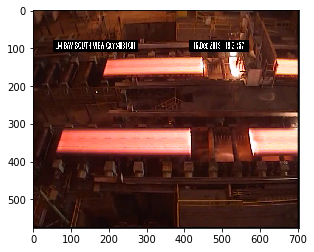

In [10]:
ret, frame = cap.read()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [11]:
#cv2.imwrite("77350.jpg",frame)

In [12]:
#jkbond = cv2.resize(jkbond,None,fx=2,fy=2,interpolation = cv2.INTER_CUBIC)

In [13]:
r,g,b = cv2.split(frame)

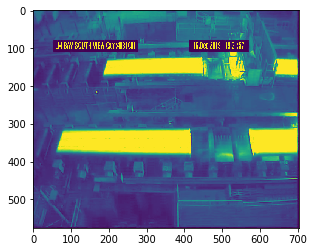

In [14]:
plt.imshow(r)

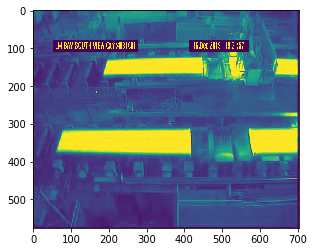

In [15]:
hsv = cv2.cvtColor(frame,cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
plt.imshow(v)

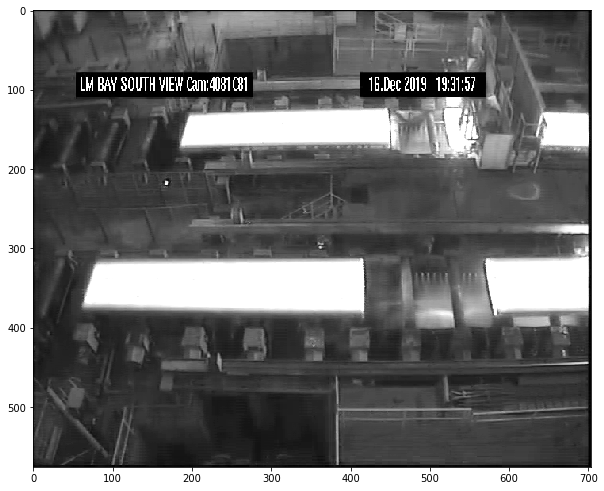

In [16]:
dst = cv2.addWeighted(v, .1, r, 1, 0.0)
plt.figure(figsize=(10,12))
plt.imshow(dst,"gray")

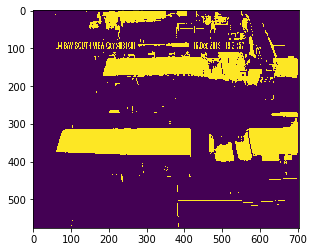

In [17]:
#thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-15)
_,thresh = cv2.threshold(dst,120,255,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [18]:
_ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
cnts = sorted(contours, key = cv2.contourArea,reverse= True)

In [20]:
blank = np.zeros((thresh.shape),dtype = np.uint8)
ordr = 0
blank = cv2.drawContours(blank,cnts,ordr,(255,255,0),3)

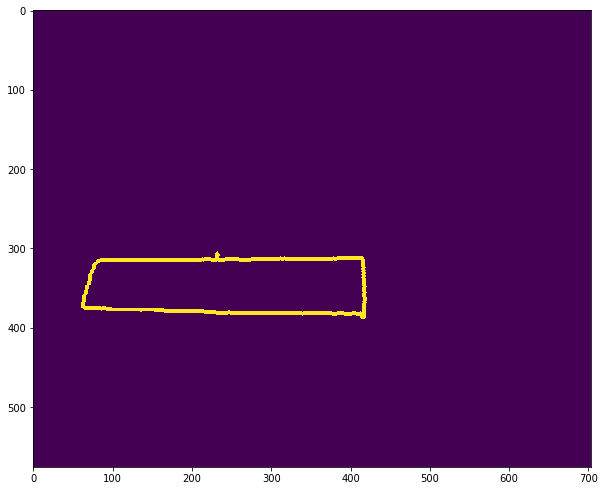

In [21]:
plt.figure(figsize=(10,12))
plt.imshow(blank)

In [22]:
x,y,w,h = cv2.boundingRect(cnts[ordr])
print(x,y,w,h)

62 306 357 82


In [23]:
redLeft = [x,y]
redRight = [x+w,y]
print(redLeft,redRight)

[62, 306] [419, 306]


In [24]:
tl = [188,421]
bl = [268,421]

In [25]:
dB = dist.euclidean(tl,bl)

pixelsPerMetric = dB / 1800
    
dimB = dB / pixelsPerMetric
print(dimB)

1800.0


In [26]:
pixelsPerMetric

0.044444444444444446

In [27]:
1/pixelsPerMetric

22.5

In [28]:
'''redLeft = [71,335]
redRight = [416,335]'''
#redLeft = [134,360]
#redRight = [500,360]

'redLeft = [71,335]\nredRight = [416,335]'

In [29]:
#%matplotlib notebook

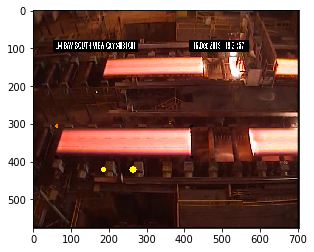

In [30]:
cv2.circle(test,(186,421),1,(255,255,0),10)
cv2.circle(test,(264,421),1,(255,255,0),15)

cv2.circle(test,(x,y),2, (255,120,0), 5)
cv2.circle(test,(x+w,y),2,-1,2)
cv2.circle(test,(x,y+h),2,-1,2)
cv2.circle(test,(x+w,y+h),2,-1,2)
#plt.figure(figsize=(10,12))
plt.imshow(test)

In [31]:
#cv2.imwrite("imgRef.jpg",dst)

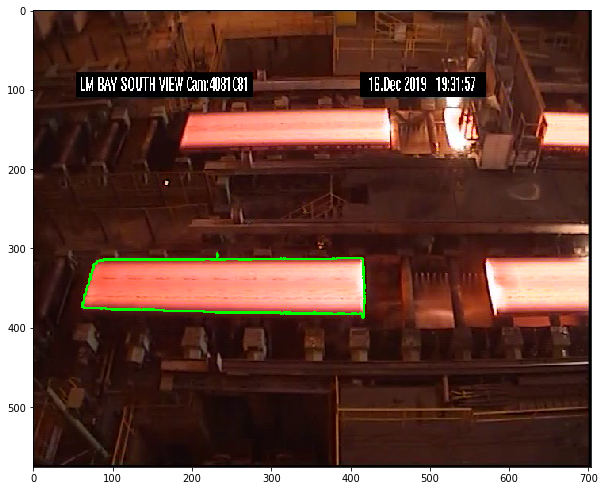

In [32]:
imgContour = cv2.drawContours(frame.copy(),cnts,ordr,(0,255,0),2)

plt.figure(figsize=(10,12))
plt.imshow(imgContour)

# length

In [33]:
dB = dist.euclidean(redLeft,redRight)
    
dimB = dB / pixelsPerMetric
print(dimB/1000,"Meters")

8.0325 Meters


In [34]:
1 / pixelsPerMetric

22.5

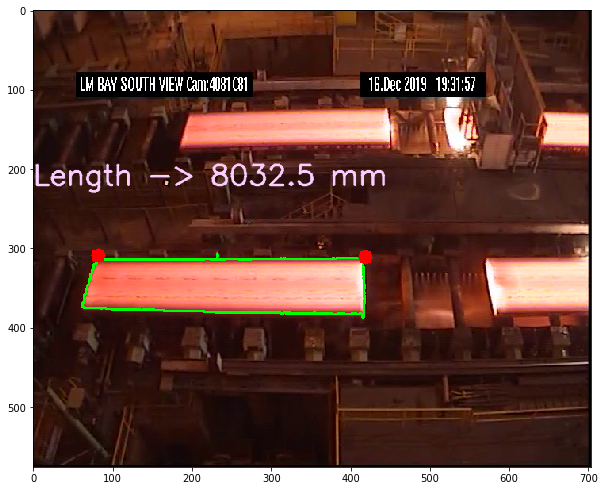

In [35]:
imgContour = cv2.circle(imgContour.copy(),(redLeft[0]+20,redLeft[1]+3) , 1, 255, 15)
imgContour = cv2.circle(imgContour.copy(),(redRight[0],redRight[1]+5) , 1, 255, 15)
font = cv2.FONT_HERSHEY_SIMPLEX
plt.figure(figsize=(10,12))
imgContour = cv2.putText(imgContour.copy(),"Length -> {} mm".format(dimB),(0,220), font, 1.2, (250,205,255), 2, cv2.LINE_AA)
plt.imshow(imgContour)

In [36]:
8000-dimB

-32.5

In [37]:
#imgContour = cv2.cvtColor(imgContour,cv2.COLOR_RGB2BGR)
#cv2.imwrite("C:/Users/shrin/Documents/Abhilash/report/day1_length.jpg",imgContour)

In [38]:
'''bb = [121,377]
bt = [121,371]
'''
bb = [x,y]
bt = [x,y+h]

In [39]:
dB = dist.euclidean(bb,bt)
    
dimB = dB / pixelsPerMetric
print(dimB)

1845.0


In [40]:
2025 - dimB

180.0

In [41]:
db = dist.euclidean([0,0],[1,0])
print(db)
print(db/pixelsPerMetric)

1.0
22.5


# Threshold

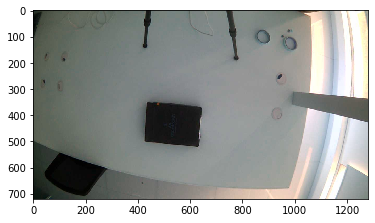

In [42]:
# 
jkbond = cv2.imread("C:/Users/shrin/Pictures/Camera Roll/WIN_20191210_17_07_37_Pro.jpg")
plt.imshow(jkbond)

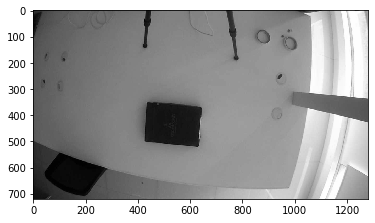

In [43]:
gray = cv2.cvtColor(jkbond,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,"gray")

In [44]:
# x,y
tl = [520,609]
tr = [633,600]
bl = [520,640]
br = [633,640]

In [45]:
_,undistortedThreh = cv2.threshold(gray,90,250,cv2.THRESH_BINARY)
gauss = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,25)

In [46]:
blank = np.zeros((gauss.shape))

# Real_obj_dst = (dst * objct_height_in_PIX * sensor_height_MM) / ( FL_in_MM * img_height_PIX)

In [47]:
lenght = tr[1] - tl[1]
width = br[0] - bl[0]

In [48]:
dst = 117 *10

In [49]:
Real_obj_lenght = ( dst * (lenght) * 3.6) / (3.2 * blank.shape[1])

In [50]:
Real_obj_lenght

-9.2548828125

In [51]:
Real_obj_width = ( dst * (width) * 3.6) / (3.2 * blank.shape[1])

In [52]:
Real_obj_width

116.2001953125